# 讀取資料庫

In [1]:
%env KERAS_BACKEND = tensorflow
%matplotlib inline

env: KERAS_BACKEND=tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation, Add, MaxPool2D , Conv2D 
from keras.layers.core import Flatten
from keras.optimizers import adam

from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


# 資料前處理

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

# 架設神經網路

In [5]:
model = Sequential()
# Convolution Layer
## layer1
model.add(Conv2D(8,(3,3), padding='same',input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
## layer2
model.add(Conv2D(16,(5,5),padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
## layer3
model.add(Conv2D(32,(7,7),padding = 'same'))
model.add(Activation('sigmoid'))
model.add(MaxPool2D(pool_size = (2,2)))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
## layer1
model.add(Dense(10,activation = 'relu'))
## layer2
model.add(Dense(10,activation = 'softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          25120     
__________

In [7]:
model.compile(loss = 'mse', optimizer="adam",metrics = ['accuracy'])

# 開始訓練

In [8]:
model_fit = model.fit(x_train, y_train, batch_size=300, epochs = 10) # kernal

Epoch 1/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.0396 - acc: 0.7241
Epoch 2/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.0066 - acc: 0.9633
Epoch 3/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.0042 - acc: 0.9757
Epoch 4/10
60000/60000 [==============================] - 49s 822us/step - loss: 0.0033 - acc: 0.9810
Epoch 5/10
60000/60000 [==============================] - 50s 840us/step - loss: 0.0028 - acc: 0.9835
Epoch 6/10
60000/60000 [==============================] - 50s 837us/step - loss: 0.0025 - acc: 0.9850
Epoch 7/10
60000/60000 [==============================] - 52s 864us/step - loss: 0.0022 - acc: 0.9868
Epoch 8/10
60000/60000 [==============================] - 52s 863us/step - loss: 0.0021 - acc: 0.9878
Epoch 9/10
60000/60000 [==============================] - 50s 839us/step - loss: 0.0018 - acc: 0.9899
Epoch 10/10
60000/60000 [==============================] - 53s 884us/step - loss: 

In [9]:
score_train = model.evaluate(x_train, y_train, batch_size=400)
score_test = model.evaluate(x_test, y_test, batch_size=400)
print('train_loss:',score_train[0],'train_accuracy:',score_train[1] )
print('test_loss:',score_test[0],'test_accuracy:',score_test[1] )

10000/10000 [==============================] - 3s 287us/step
train_loss: 0.001603947252733633 train_accuracy: 0.9908833420276641
test_loss: 0.0022185858816374093 test_accuracy: 0.9864000129699707


<function matplotlib.pyplot.show(*args, **kw)>

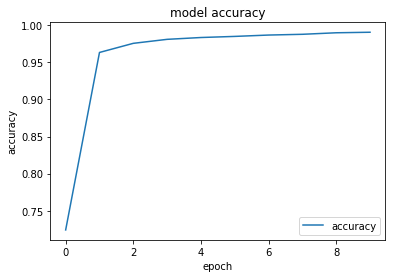

In [10]:
plt.plot(model_fit.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show